In [1]:
import pandas as pd
import re

minute_aggregation = pd.read_csv('Resources/cleaned_merged_minute_aggregate_data-2022-11-17.csv')
minute_df = pd.DataFrame(minute_aggregation)

In [2]:
minute_df.head()

,Unnamed: 0,time,country,total_sessions,total_session_duration_seconds,operator,channel,cleaned_content_id,genre,region
0,0,2021-02-16 00:57:00,Finland,1.0,20.0,Op_001,Channel_002,PRO_1301,"OPERA , CLASSICAL",Europe
1,1,2021-02-16 01:22:00,Morocco,1.0,13.0,Op_001,Channel_002,PRO_1326,"ORCHESTRA, CLASSICAL, CONCERTO",Africa
2,2,2021-02-16 05:03:00,Germany,1.0,2.0,Op_001,Channel_002,PRO_1355,"ROMANTIC, CHAMBER MUSIC",Europe
3,3,2021-02-16 14:03:00,Italy,1.0,29.0,Op_001,Channel_002,PRO_1293,"OPERA , ROMANTIC",Europe
4,4,2021-02-16 15:28:00,Morocco,1.0,44.0,Op_001,Channel_002,PRO_1351,"ORCHESTRA, 20TH CENTURY",Africa


In [3]:
minute_df.dtypes
minute_df['time'] = pd.to_datetime(minute_df['time'])
minute_df

,Unnamed: 0,time,country,total_sessions,total_session_duration_seconds,operator,channel,cleaned_content_id,genre,region
0,0,2021-02-16 00:57:00,Finland,1.0,20.0,Op_001,Channel_002,PRO_1301,"OPERA , CLASSICAL",Europe
1,1,2021-02-16 01:22:00,Morocco,1.0,13.0,Op_001,Channel_002,PRO_1326,"ORCHESTRA, CLASSICAL, CONCERTO",Africa
2,2,2021-02-16 05:03:00,Germany,1.0,2.0,Op_001,Channel_002,PRO_1355,"ROMANTIC, CHAMBER MUSIC",Europe
3,3,2021-02-16 14:03:00,Italy,1.0,29.0,Op_001,Channel_002,PRO_1293,"OPERA , ROMANTIC",Europe
4,4,2021-02-16 15:28:00,Morocco,1.0,44.0,Op_001,Channel_002,PRO_1351,"ORCHESTRA, 20TH CENTURY",Africa
...,...,...,...,...,...,...,...,...,...,...
42146610,52436891,2022-06-26 23:55:00,United States,7.0,404.0,Op_005,Channel_001,PLY_2921,"FLAMENCO,GLOBAL MUSIC / WORLD MUSIC,BOSSA NOVA...",North America
42146611,52436892,2022-06-26 23:56:00,United States,10.0,384.0,Op_005,Channel_001,PLY_2921,"FLAMENCO,GLOBAL MUSIC / WORLD MUSIC,BOSSA NOVA...",North America
42146612,52436893,2022-06-26 23:57:00,United States,6.0,354.0,Op_005,Channel_001,PLY_2921,"FLAMENCO,GLOBAL MUSIC / WORLD MUSIC,BOSSA NOVA...",North America
42146613,52436894,2022-06-26 23:58:00,United States,9.0,508.0,Op_005,Channel_001,PLY_2921,"FLAMENCO,GLOBAL MUSIC / WORLD MUSIC,BOSSA NOVA...",North America


In [4]:
minute_df.dtypes

Unnamed: 0                                 int64
time                              datetime64[ns]
country                                   object
total_sessions                           float64
total_session_duration_seconds           float64
operator                                  object
channel                                   object
cleaned_content_id                        object
genre                                     object
region                                    object
dtype: object

In [5]:
# drop extra index column
minute_df = minute_df.drop(columns=minute_df.columns[0], axis=1)
# loc to timeframe of advertising data
minute_df = minute_df.loc[(minute_df['time'] >= '2022-01-01 00:00:00') & (minute_df['time'] <='2022-10-25 23:59:59')]
# drop columns
minute_df = minute_df.drop(['operator', 'channel', 'cleaned_content_id'], axis=1)
# isolate only united kingdom
minute_df = minute_df.loc[(minute_df['country'] == 'United Kingdom')]
# remove space after comma for some genre entries for get dummies seperator
minute_df['genre'] = minute_df['genre'].str.replace(r'([ ]+,[ ]+)',",")
minute_df['genre'] = minute_df['genre'].str.strip()

C:\Users\Peter Nguyen\AppData\Local\Temp\ipykernel_10048\587335619.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  minute_df['genre'] = minute_df['genre'].str.replace(r'([ ]+,[ ]+)',",")


In [6]:
minute_df = pd.concat([minute_df,minute_df.genre.str.get_dummies(sep=',')],1)
minute_df = minute_df.drop('genre', axis=1)
minute_df.columns = minute_df.columns.str.strip()
minute_df

C:\Users\Peter Nguyen\AppData\Local\Temp\ipykernel_10048\629626420.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  minute_df = pd.concat([minute_df,minute_df.genre.str.get_dummies(sep=',')],1)


,time,country,total_sessions,total_session_duration_seconds,region,20TH CENTURY,ACID TECHNO,ACID-JAZZ,AFRO DANCE,AFRO HOUSE,...,TOUAREG MUSIC,TRANCE,TRAP,TRIP HOP,TROPICAL HOUSE,TURKISH FOLK MUSIC,VOCAL JAZZ,WEST AFRICAN MUSIC,WEST COAST RAP,ZOUK
18062196,2022-01-01 00:00:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062199,2022-01-01 00:01:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062203,2022-01-01 00:02:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062207,2022-01-01 00:03:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062212,2022-01-01 00:04:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42140736,2022-06-26 21:57:00,United Kingdom,1.0,44.0,Europe,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42140819,2022-06-26 22:51:00,United Kingdom,1.0,59.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42140854,2022-06-26 23:19:00,United Kingdom,1.0,45.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42140883,2022-06-26 23:42:00,United Kingdom,1.0,60.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
minute_df

,time,country,total_sessions,total_session_duration_seconds,region,20TH CENTURY,ACID TECHNO,ACID-JAZZ,AFRO DANCE,AFRO HOUSE,...,TOUAREG MUSIC,TRANCE,TRAP,TRIP HOP,TROPICAL HOUSE,TURKISH FOLK MUSIC,VOCAL JAZZ,WEST AFRICAN MUSIC,WEST COAST RAP,ZOUK
18062196,2022-01-01 00:00:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062199,2022-01-01 00:01:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062203,2022-01-01 00:02:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062207,2022-01-01 00:03:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18062212,2022-01-01 00:04:00,United Kingdom,1.0,60.0,Europe,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42140736,2022-06-26 21:57:00,United Kingdom,1.0,44.0,Europe,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42140819,2022-06-26 22:51:00,United Kingdom,1.0,59.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42140854,2022-06-26 23:19:00,United Kingdom,1.0,45.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42140883,2022-06-26 23:42:00,United Kingdom,1.0,60.0,Europe,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# check column names
print(minute_df.columns.values.tolist())

['time', 'country', 'total_sessions', 'total_session_duration_seconds', 'region', '20TH CENTURY', 'ACID TECHNO', 'ACID-JAZZ', 'AFRO DANCE', 'AFRO HOUSE', 'AFRO-CUBAN JAZZ', 'AFRO-POP / AFROBEATS', 'AFROBEAT', 'ALTERNATIVE', 'ALTERNATIVE HIP-HOP', 'AMBIENT', 'ARABIC MUSIC', 'AVANT-GARDE JAZZ', 'BALLET', 'BAROQUE', 'BEBOP', 'BIG BAND', 'BLUE-EYED SOUL / A.O.R.', 'BLUES', 'BLUES ROCK', 'BOOGIE-FUNK', 'BOSSA NOVA', 'BOSSA-JAZZ', 'BOUNCE MUSIC', 'BRASS BAND', 'BREAKDANCE', 'BROKEN BEAT', 'CARIBBEAN MUSIC', 'CENTRAL AFRICAN MUSIC', 'CHAMBER MUSIC', 'CHAÂBI', 'CHICAGO BLUES', 'CLASSICAL', 'CLASSICAL CROSSOVER', 'CONCERTO', 'CONSCIOUS HIP HOP', 'CONTEMPORARY', 'CONTEMPORARY DANCE', 'CONTEMPORARY JAZZ', 'COOL JAZZ / WEST COAST JAZZ', 'COUNTRY BLUES', 'CROSSOVER JAZZ', 'DANCE', 'DARK AMBIENT', 'DARK TECHNO', 'DEEP HOUSE', 'DETROIT TECHNO', 'DIRTY SOUTH RAP', 'DISCO', 'DISCO HOUSE', 'DOWNTEMPO / CHILL OUT', 'DUBTRONICA', 'EAST COAST RAP', 'ELECTRO', 'ELECTRO HOUSE', 'ELECTRO JAZZ / NU-JAZZ', 'ELE

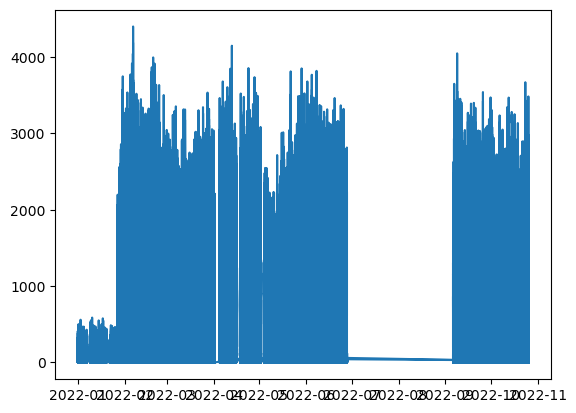

In [10]:
import matplotlib.pyplot as plt
plt.plot(minute_df['time'],minute_df['total_session_duration_seconds'])

<AxesSubplot:title={'center':'Hourly Session Volume January 2022'}, xlabel='Time (Hourly)', ylabel='Total Sessions'>

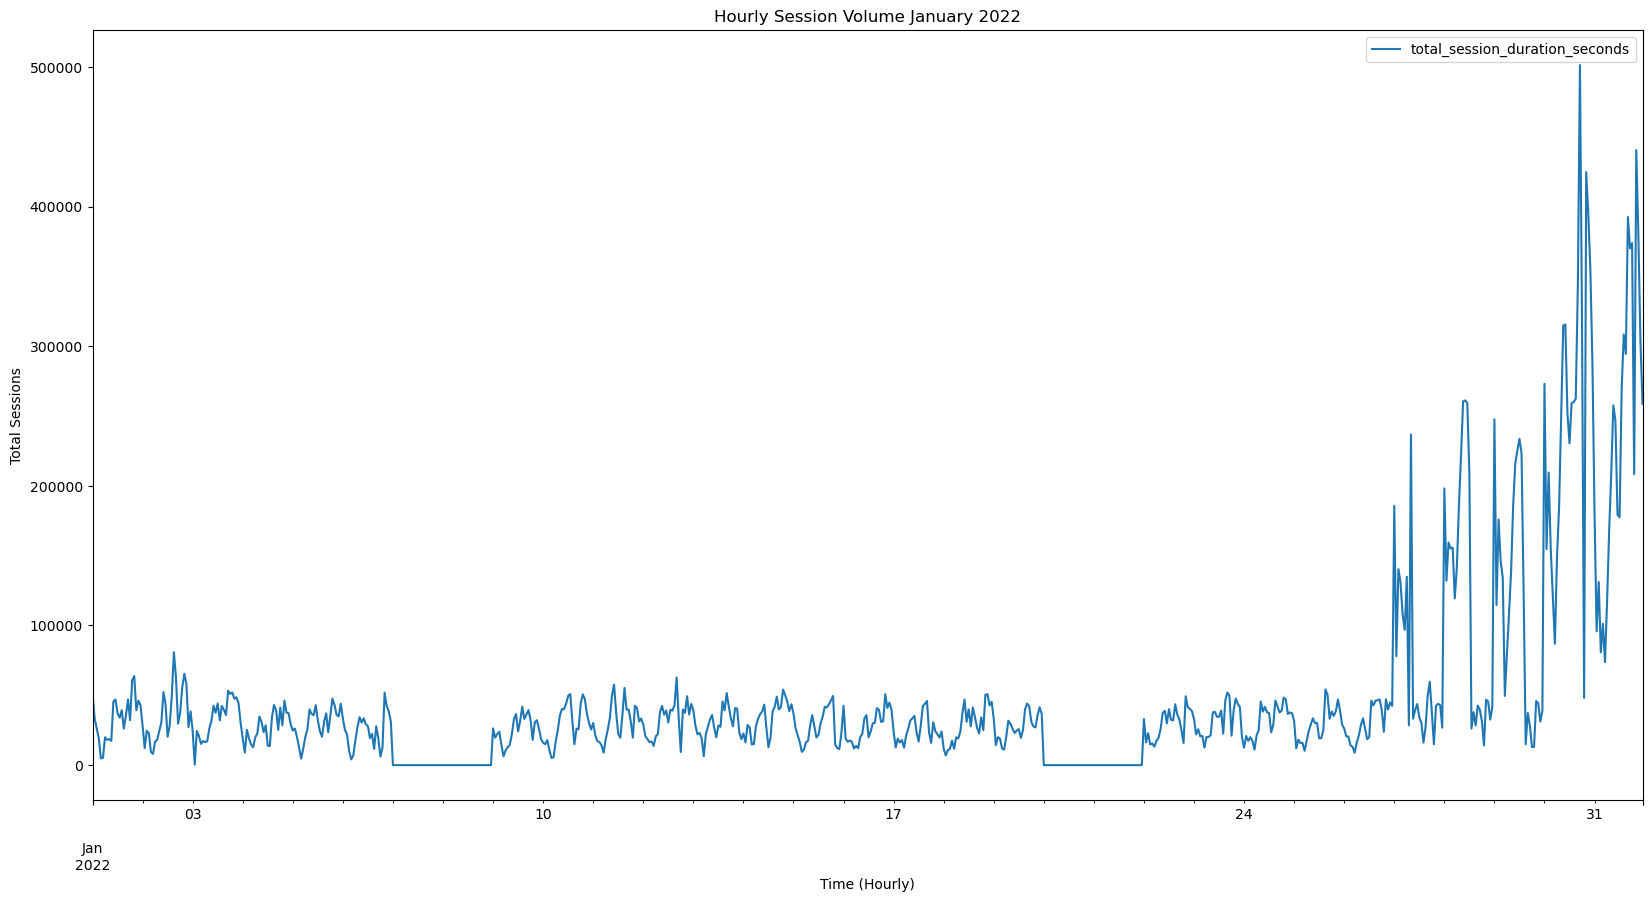

In [64]:
view = minute_df.loc[(minute_df['time'] >= '2022-01-01 00:00:00') & (minute_df['time'] <='2022-01-31 23:59:59')]
# view = view.sort_values(['time'])
# view = view.groupby('time').sum().reset_index()
view = view.resample('H', on='time').sum().reset_index()
view = view.sort_values(['time'])
view.plot(x= 'time',y= 'total_session_duration_seconds', kind='line', figsize=(20,10),xlabel='Time (Hourly)', ylabel = 'Total Sessions', title='Hourly Session Volume January 2022')